## How to create multiple linecharts in Seaborn     

This workbook describes how to create multiple line charts on the same plot in Seaborn

## 1. Load required libraries   

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
# Seaborn library
import seaborn as sns
sns.set_theme(style = "darkgrid")

## 2. Check data folder content

### 2.1 Change wd to data sub folder

In [2]:
wd = os.getcwd()
print('My working directory is:',wd)

My working directory is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python/Seaborn_gallery


In [3]:
# Change current wd to top folder directory to access \data sub-folder
project_directory = os.path.join('/home','pablo','Documents','Pablo_zorin','VS_Python_GitHub_Pablo_source','ML-using-Python')
my_directory = os.chdir(project_directory)
wd = os.getcwd()
print('My new WD is:',wd)

My new WD is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python


### 2.2 List files in data sub-folder

In [4]:
data_folder = os.path.join('/home','pablo','Documents','Pablo_zorin','VS_Python_GitHub_Pablo_source','ML-using-Python','data')
data_folder_contents = os.listdir(data_folder)
print('data folder contents are:',data_folder_contents)

data folder contents are: ['wine_quality.zip', 'winequality.names', 'Monthly-AE-Time-Series-January-2024.xls', 'INE Resident population country of birth Spain.xlsx', 'AE_Time_Series_Data_website.txt', 'winequality-red.csv', 'OCDE_countries_population_figures_1970_2022.csv', 'all_wine_reset.csv', '03_INE_Spain_natural_growh_births_deaths.xlsx', '02 INE Spain CV population stocks and flows 2002 2025.xlsx', 'AE_Attendances_TypeI_2010_2025.csv', 'AE_Attendances_Aug2010_Mar_2025.csv', 'Monthly-AE-Time-Series-March-2025.xls', 'AE_Attendances_2010_2024.csv', 'Type_I_ATT_TEST.csv', 'Type_I_ATT_TRAIN.csv', 'ONS_Figure_2__Population_increase_in_mid-2023_was_driven_mostly_by_net_international_migration.xls', 'winequality-white.csv', 'INE total and foreign population figures Spain.xlsx', 'monthly-milk-production-pounds.csv', 'ONS_Figure_01_Long_term_emigration_immigration_net_migration.xlsx', 'ONS_long_term_immigration_end2024.xlsx', '01 INE resident population by nationality Spain and CV 2002 202

In [5]:
# Check .csv files available in the /data sub-folder
# I want to import .csv file "data/AE_Attendances_Aug2010_Mar_2025.csv"
for files in os.listdir(data_folder):
    if files.endswith('.csv'):
        print(files)
    else:
        continue

winequality-red.csv
OCDE_countries_population_figures_1970_2022.csv
all_wine_reset.csv
AE_Attendances_TypeI_2010_2025.csv
AE_Attendances_Aug2010_Mar_2025.csv
AE_Attendances_2010_2024.csv
Type_I_ATT_TEST.csv
Type_I_ATT_TRAIN.csv
winequality-white.csv
monthly-milk-production-pounds.csv


In [7]:
# Searching specifically for 2025 data files
for files in os.listdir(data_folder):
    if files.endswith('Mar_2025.csv'):
        print(files)
    else:
        continue

AE_Attendances_Aug2010_Mar_2025.csv


## 3. Import .csv file into Python

In "AE_Attendances_Aug2010_2025.csv" file there is Period column that I need to parse it as Date colum, specifying it in the set of read_csv() arguments.

In [9]:
Attendances_file = os.path.join('data','AE_Attendances_Aug2010_Mar_2025.csv')

AE_data = pd.read_csv(Attendances_file,
                      parse_dates=['Period'])
AE_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Period     176 non-null    datetime64[ns]
 1   Type1_ATT  176 non-null    int64         
 2   Type2_ATT  176 non-null    int64         
 3   Type3_ATT  176 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.6 KB


In [10]:
AE_data.head()

,Period,Type1_ATT,Type2_ATT,Type3_ATT
0,2010-01-08,1138652,54371,559358
1,2010-01-09,1150728,55181,550359
2,2010-01-10,1163143,54961,583244
3,2010-01-11,1111295,53727,486005
4,2010-01-12,1159204,45536,533001


## 4. Pivot data from Wide to Long to plot is in Seaborn

I need a single column called "Type" that will include the Attendances type as character variable. This will be used in the "hue" argument of the sns.lineplot() function to assign different colour to each type of Attendances (Type1,Type2,Type3) resulting in a three line chart.

In [12]:
AE_data.columns

Index(['Period', 'Type1_ATT', 'Type2_ATT', 'Type3_ATT'], dtype='object')

- using melt() to pivot wide to long, not required to declare dataframe, just id_vars and colunms to turn into rows

In [14]:
AE_data_long = AE_data.melt(id_vars = 'Period',
    value_vars = ['Type1_ATT','Type2_ATT','Type3_ATT'] 
)
AE_data_long.head()

,Period,variable,value
0,2010-01-08,Type1_ATT,1138652
1,2010-01-09,Type1_ATT,1150728
2,2010-01-10,Type1_ATT,1163143
3,2010-01-11,Type1_ATT,1111295
4,2010-01-12,Type1_ATT,1159204


In [15]:
# Get distinct values from variable column
AE_data_long['variable'].unique()

array(['Type1_ATT', 'Type2_ATT', 'Type3_ATT'], dtype=object)

## 5.Plot multiple line seaborn chart from previous dataframe

Using previously long format reshaped dataframe "AE_data_long" plot seaborn diplaying each Attendances type (Type1,Type2,Type3) as a unique line in a seaborn sns.lineplot()

- Now using seaborn, I can use **hue** argument to plot unique variable column values as individual line charts

In [21]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
sns.set_theme(style = "darkgrid")

In [18]:
# Check data structure
AE_data_long.head()

,Period,variable,value
0,2010-01-08,Type1_ATT,1138652
1,2010-01-09,Type1_ATT,1150728
2,2010-01-10,Type1_ATT,1163143
3,2010-01-11,Type1_ATT,1111295
4,2010-01-12,Type1_ATT,1159204


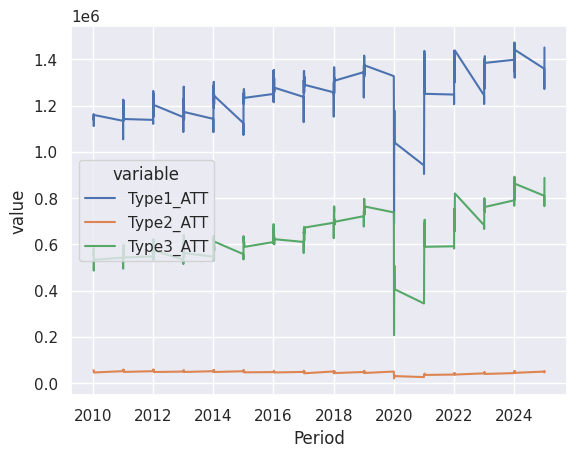

In [17]:
sns.lineplot(data = AE_data_long, x = 'Period', y = 'value', hue = 'variable')
plt.show()

- Format previous line chart and dave it in the Seaborn_plots sub-folder

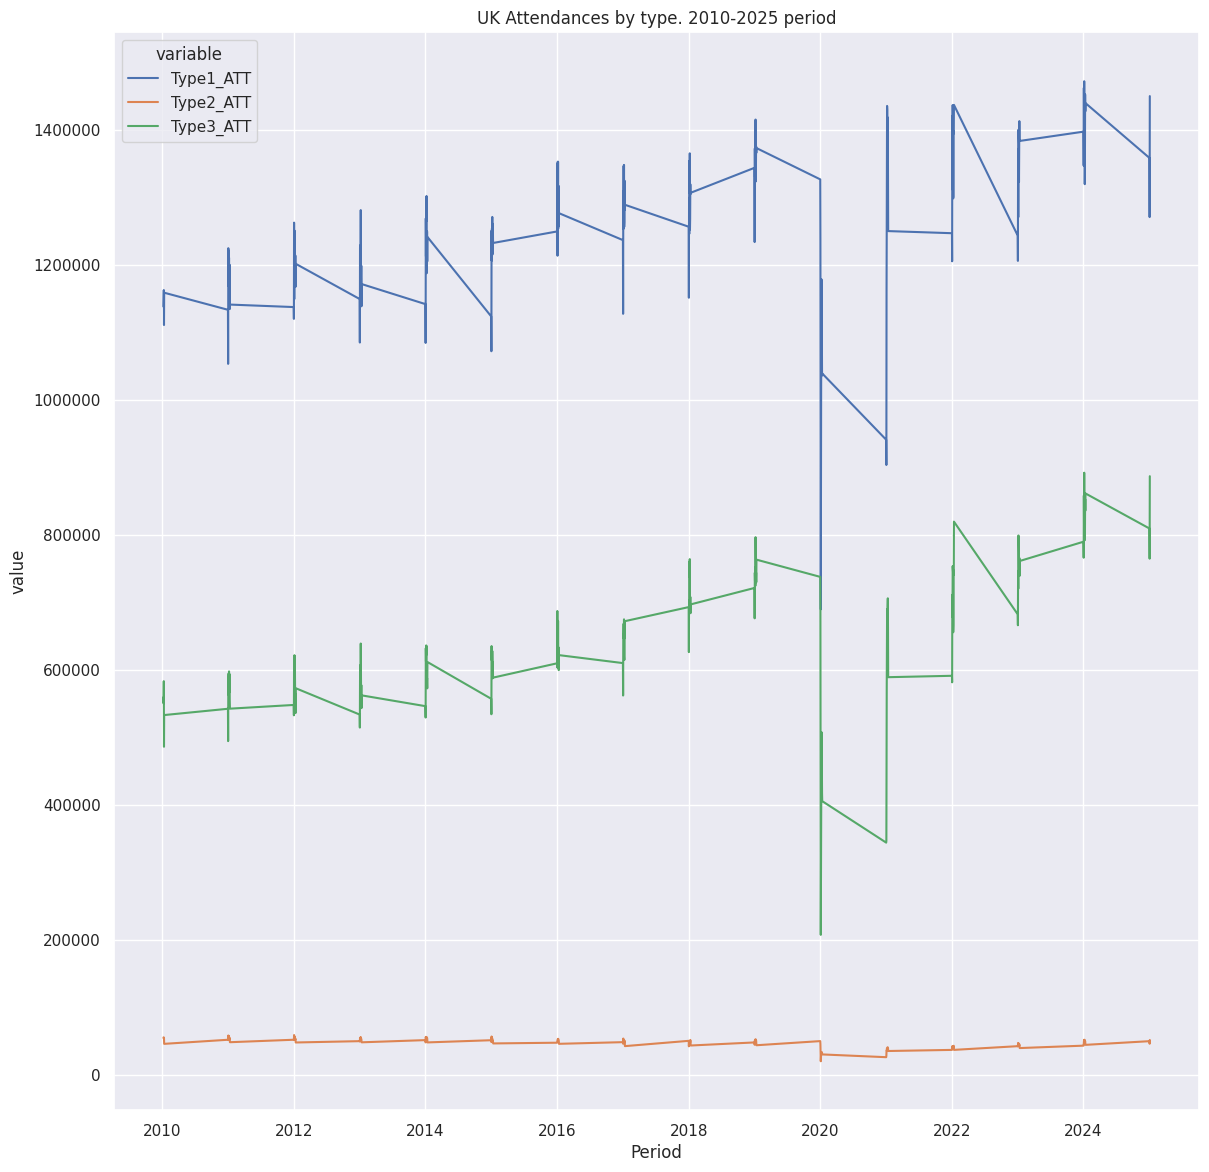

In [22]:
fig = plt.figure(figsize=(14,14))
ax = sns.lineplot(data = AE_data_long, x = 'Period', y = 'value', hue = 'variable')
ax.set(title = 'UK Attendances by type. 2010-2025 period')
# Remove scientific notation from Y axis
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
# show plot
plt.show()

- Then save previous seaborn chart created as "UK Attendances multiple lines plot.png".

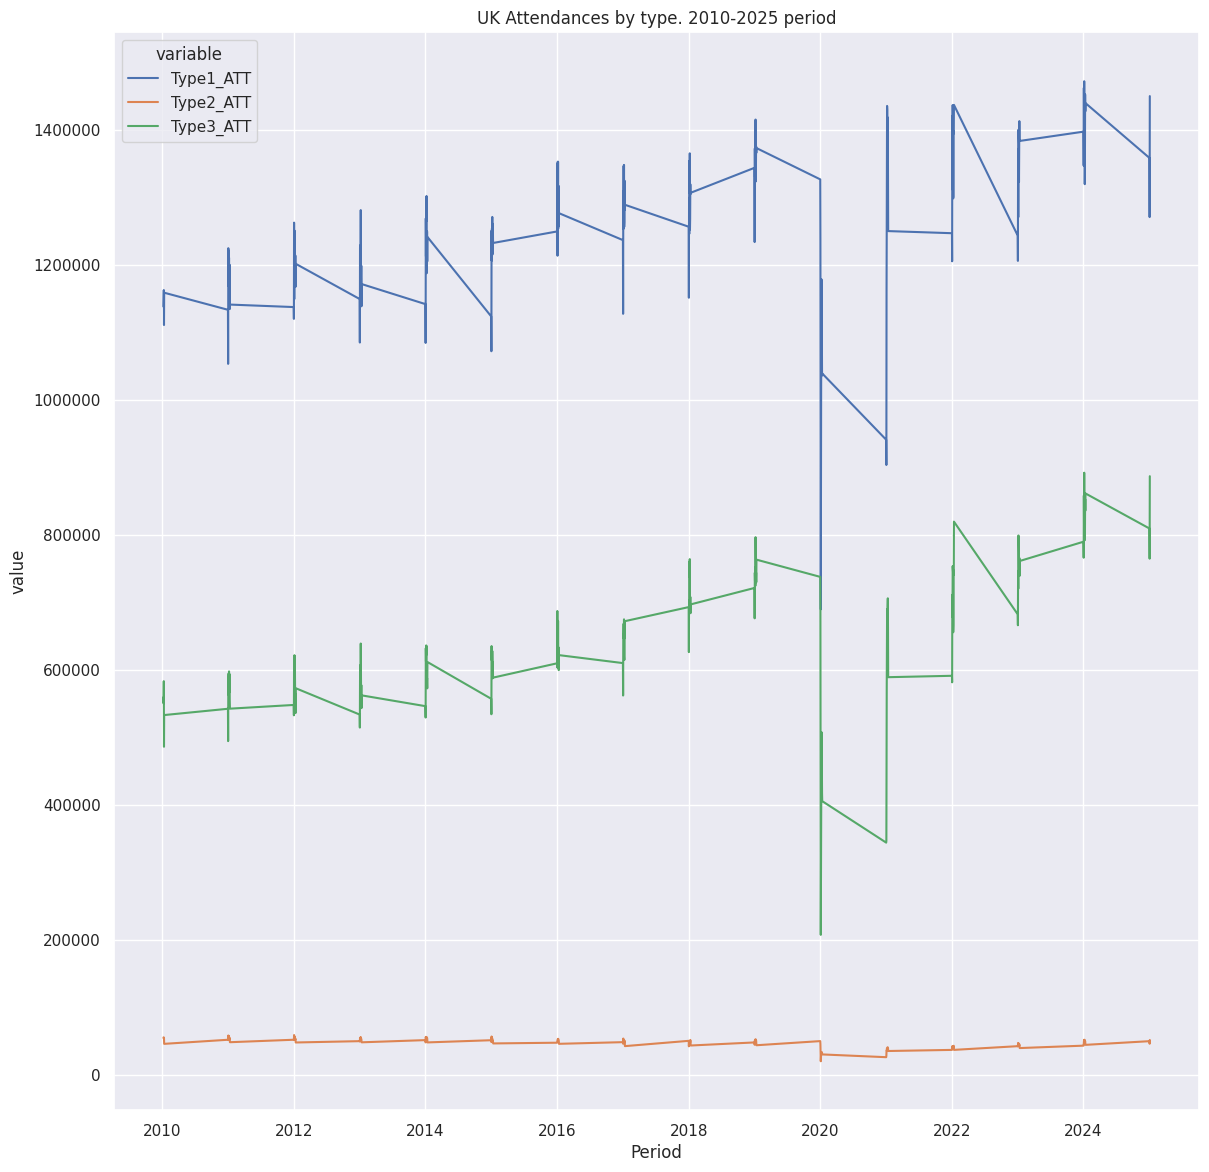

In [23]:
fig = plt.figure(figsize=(14,14))
ax = sns.lineplot(data = AE_data_long, x = 'Period', y = 'value', hue = 'variable')
ax.set(title = 'UK Attendances by type. 2010-2025 period')
# Remove scientific notation from Y axis
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
# save plot
plt.savefig('Seaborn_gallery/Seaborn_plots/UK Attendances multiple lines polot.png', bbox_inches='tight') ## This saves the output plot successfully in the project folder
plt.show()
# show plot
plt.show()